In [16]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


In [3]:
# Carregando o dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y


=== Linear Regression ===


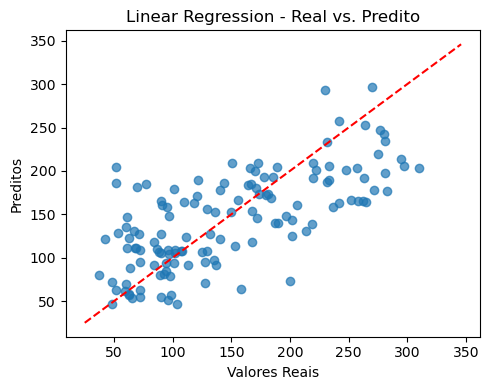

MSE: 2821.75
R²: 0.4773

=== KNN Regressor ===


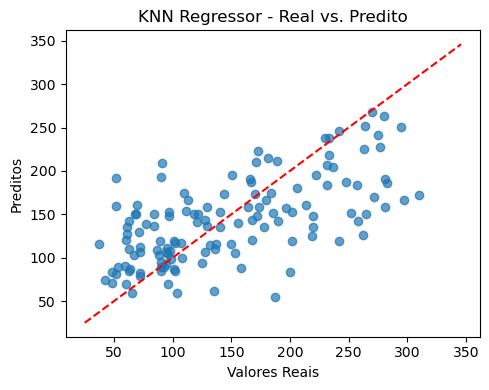

MSE: 3222.12
R²: 0.4031

=== Random Forest ===


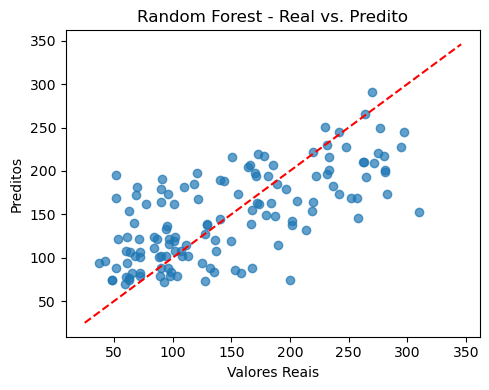

MSE: 2875.04
R²: 0.4674

=== XGBoost ===


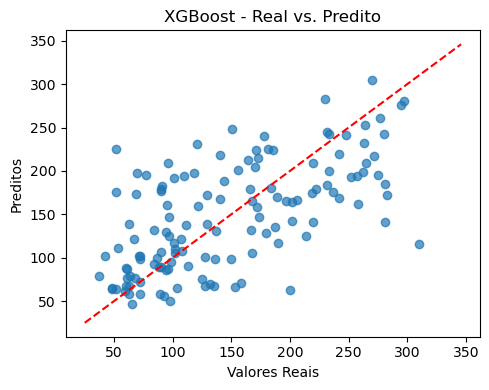

MSE: 3513.66
R²: 0.3491

=== MLP Regressor ===


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


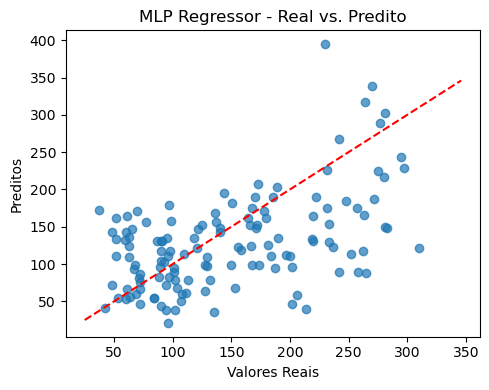

MSE: 4938.99
R²: 0.0851


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_vis = PCA(n_components=2).fit_transform(X_train)

models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "MLP Regressor": MLPRegressor(max_iter=500, random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
        
    # Plot real vs. predito
    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Valores Reais")
    plt.ylabel("Preditos")
    plt.title(f"{name} - Real vs. Predito")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.tight_layout()
    plt.show()
    
    print("MSE:", round(mse, 2))
    print("R²:", round(r2, 4))
    results.append({"Modelo": name, "MSE": mse, "R²": r2})

In [30]:
# Resultados Finais
df_resultados = pd.DataFrame(results)
df_resultados = df_resultados.sort_values("R²", ascending=False)
print("\nTabela Comparativa de Modelos")
display(df_resultados)


Tabela Comparativa de Modelos


,Modelo,MSE,R²
0,Linear Regression,2821.750981,0.477290
2,Random Forest,2875.043698,0.467418
1,KNN Regressor,3222.117895,0.403124
3,XGBoost,3513.659206,0.349118
4,MLP Regressor,4938.988746,0.085086
